<a href="https://colab.research.google.com/github/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/blob/main/ML_Data_Cleaning_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=efbcca15060cb7b3a554db3d0608c9299b52e7bb368f14b1c23acf4a78506858
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cirrhosis.csv"
)

In [4]:
# Viewing data in the file
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# checking if the any data is missing
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
# Replacing categorical data with mode
for column in ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Replacing numerical data with mean or median
for column in ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']:
    # Check if the distribution is skewed
    if data[column].skew() > 1 or data[column].skew() < -1:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)
    else:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

data.to_csv('cleaned_data_cirrhosis.csv', index=False)

In [7]:
# Reading the cleaned dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cleaned_data_cirrhosis.csv"
)

In [8]:
# Replace 'CL' with 'C' in the 'Status' column
data['Status'] = data['Status'].replace({'CL': 'C'})
data['Edema'] = data['Edema'].replace({'S': 'Y'})

In [9]:
# Viewing data
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,Y,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,Y,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,C,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [10]:
# checking if the any data is missing
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

<Figure size 800x500 with 0 Axes>

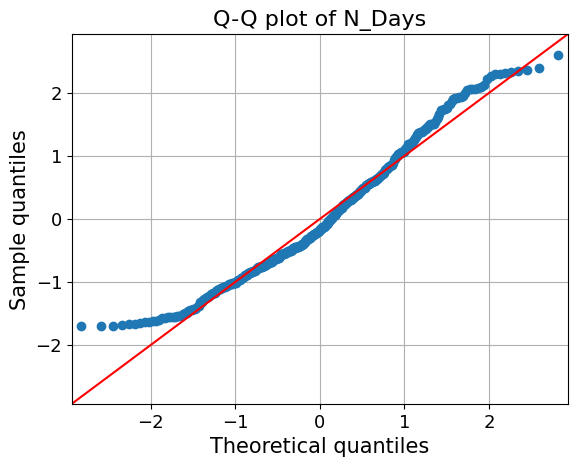

<Figure size 800x500 with 0 Axes>

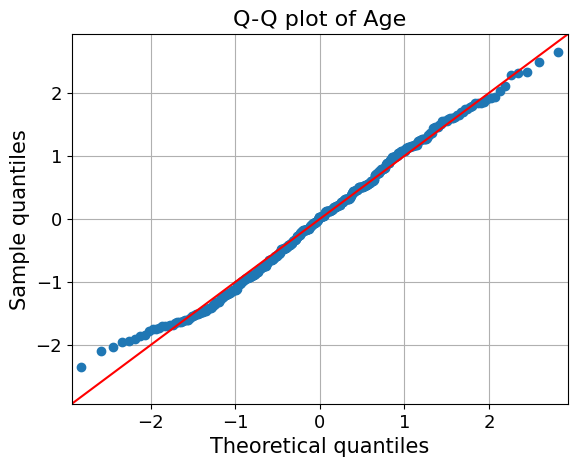

<Figure size 800x500 with 0 Axes>

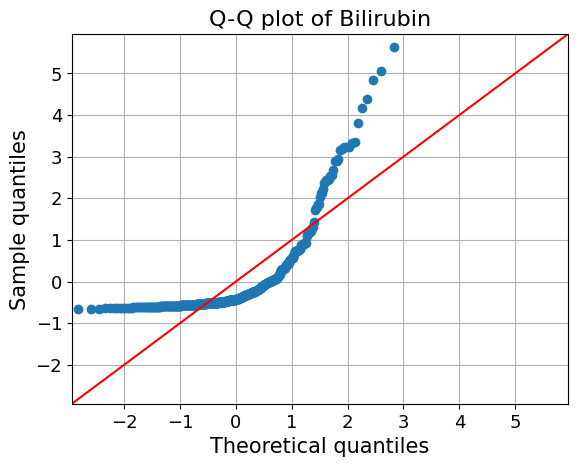

<Figure size 800x500 with 0 Axes>

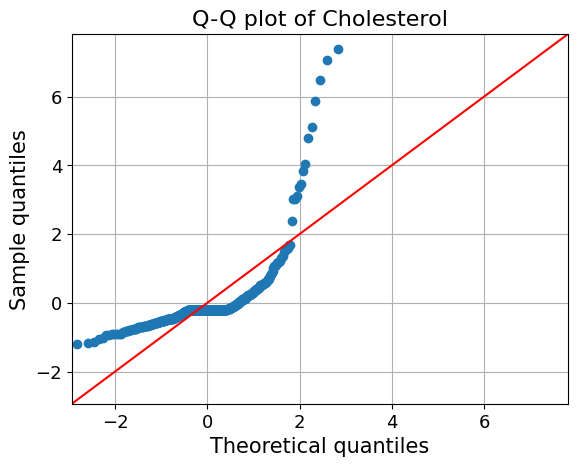

<Figure size 800x500 with 0 Axes>

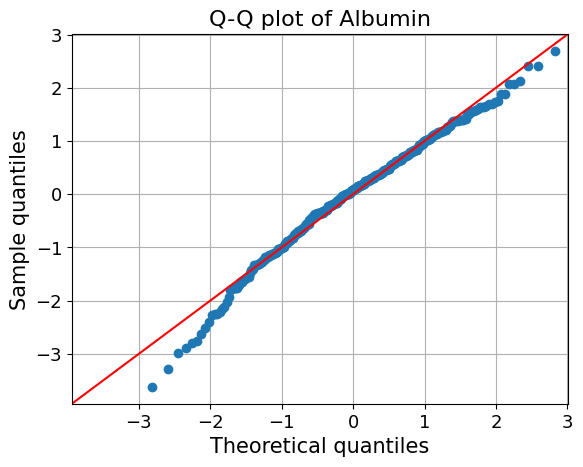

<Figure size 800x500 with 0 Axes>

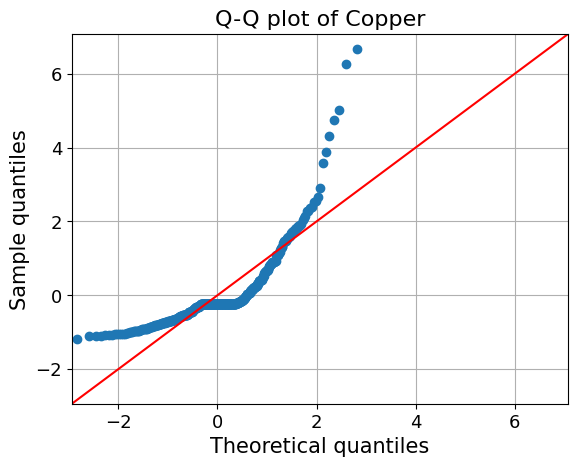

<Figure size 800x500 with 0 Axes>

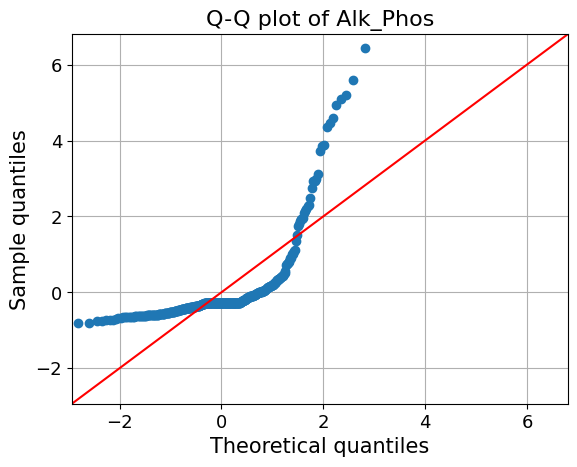

<Figure size 800x500 with 0 Axes>

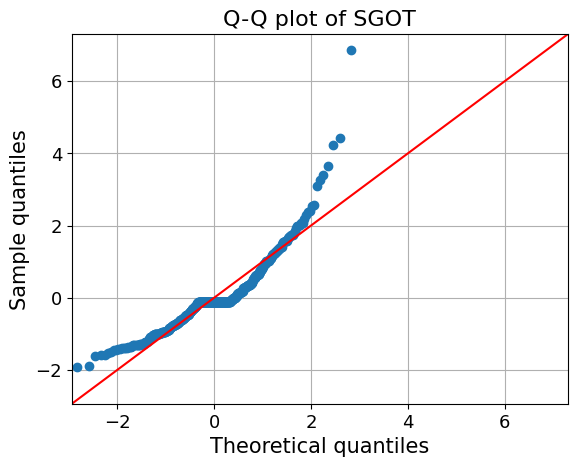

<Figure size 800x500 with 0 Axes>

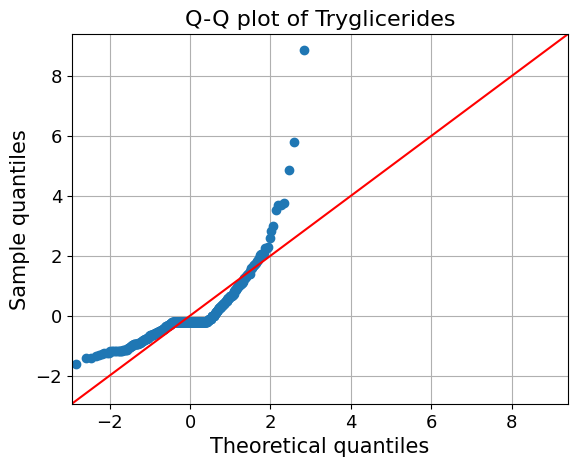

<Figure size 800x500 with 0 Axes>

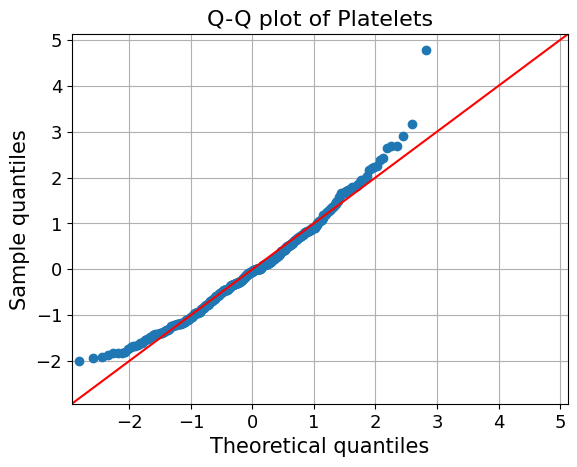

<Figure size 800x500 with 0 Axes>

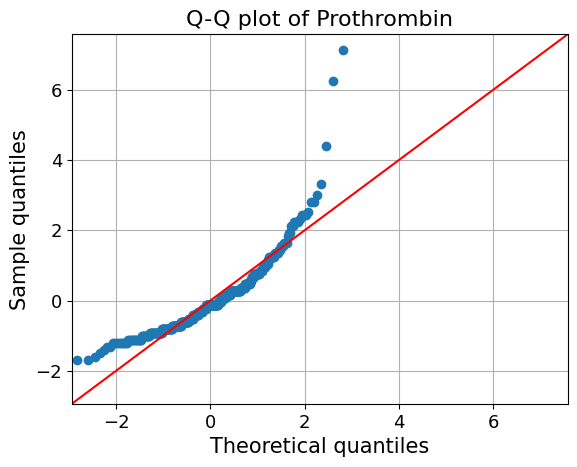

In [11]:
from statsmodels.graphics.gofplots import qqplot

# List of independent numerical variables
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Generate Q-Q plots for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data[var], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {var}', fontsize=16)
    plt.grid(True)
    plt.show()


<Axes: >

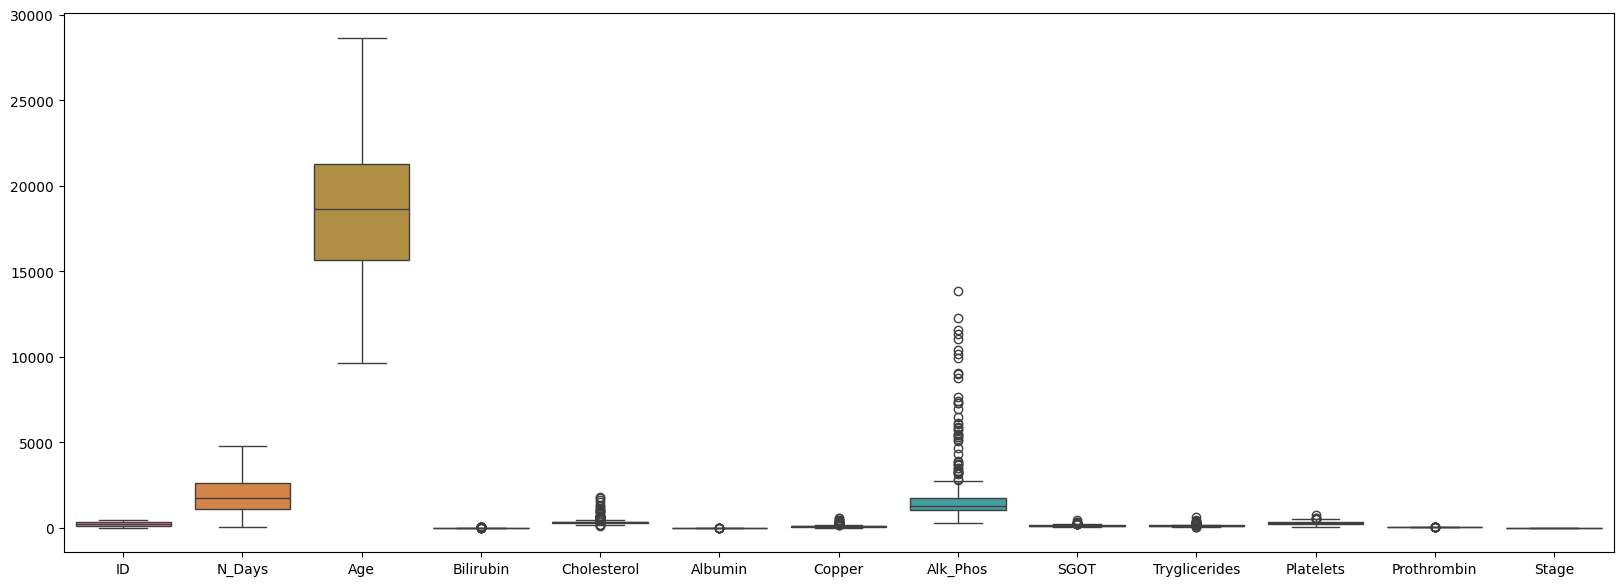

In [12]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

In [13]:
print(data.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [14]:
#Making categories to 0 & 1
data["Status"] = data["Status"].map({"D": 0, "C": 1})
data["Drug"] = data["Drug"].map({"D-penicillamine": 0, "Placebo": 1})
data["Sex"] = data["Sex"].map({"F": 0, "M": 1})
data["Ascites"] = data["Ascites"].map({"N": 0, "Y": 1})
data["Hepatomegaly"] = data["Hepatomegaly"].map({"N": 0, "Y": 1})
data["Spiders"] = data["Spiders"].map({"N": 0, "Y": 1})
data["Edema"] = data["Edema"].map({"N": 0, "Y": 1})
# Viewing data
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,0,21464,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [15]:
# Creating binary vaiables

data = pd.get_dummies(data)

# Normalizing the data in the columns

from sklearn import preprocessing

# Create x to store scaled values as floats
a = data[["N_Days"]].values.astype(float)
b = data[["Age"]].values.astype(float)
c = data[["Bilirubin"]].values.astype(float)
d = data[["Cholesterol"]].values.astype(float)
e = data[["Albumin"]].values.astype(float)
f = data[["Copper"]].values.astype(float)
g = data[["Alk_Phos"]].values.astype(float)
h = data[["SGOT"]].values.astype(float)
i = data[["Tryglicerides"]].values.astype(float)
j = data[["Platelets"]].values.astype(float)
k = data[["Prothrombin"]].values.astype(float)
l = data[["Stage"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)
e_scaled = min_max_scaler.fit_transform(e)
f_scaled = min_max_scaler.fit_transform(f)
g_scaled = min_max_scaler.fit_transform(g)
h_scaled = min_max_scaler.fit_transform(h)
i_scaled = min_max_scaler.fit_transform(i)
j_scaled = min_max_scaler.fit_transform(j)
k_scaled = min_max_scaler.fit_transform(k)
l_scaled = min_max_scaler.fit_transform(l)

# Run the normalizer on the dataframe
data[["N_Days"]] = pd.DataFrame(a_scaled)
data[["Age"]] = pd.DataFrame(b_scaled)
data[["Bilirubin"]] = pd.DataFrame(c_scaled)
data[["Cholesterol"]] = pd.DataFrame(d_scaled)
data[["Albumin"]] = pd.DataFrame(e_scaled)
data[["Copper"]] = pd.DataFrame(f_scaled)
data[["Alk_Phos"]] = pd.DataFrame(g_scaled)
data[["SGOT"]] = pd.DataFrame(h_scaled)
data[["Tryglicerides"]] = pd.DataFrame(i_scaled)
data[["Platelets"]] = pd.DataFrame(j_scaled)
data[["Prothrombin"]] = pd.DataFrame(k_scaled)
data[["Stage"]] = pd.DataFrame(l_scaled)

In [16]:
# data after nromalizing and feature creation
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,0.075515,0,0,0.622822,0,1,1,1,1,0.512635,0.085196,0.238806,0.260274,0.105279,0.258993,0.246018,0.194234,0.355556,1.000000
1,2,0.937947,1,0,0.578364,0,0,1,1,0,0.028881,0.109970,0.813433,0.085616,0.523509,0.202298,0.097345,0.241275,0.177778,0.666667
2,3,0.204249,0,0,0.839597,1,0,0,0,1,0.039711,0.033837,0.567164,0.352740,0.016724,0.161871,0.038938,0.135053,0.333333,1.000000
3,4,0.396298,0,0,0.545664,0,0,1,1,1,0.054152,0.074924,0.216418,0.102740,0.429723,0.079554,0.104425,0.183612,0.144444,1.000000
4,5,0.307741,1,1,0.226748,0,0,1,1,0,0.111913,0.096073,0.585821,0.238014,0.028143,0.201439,0.069027,0.112291,0.211111,0.666667


<Axes: >

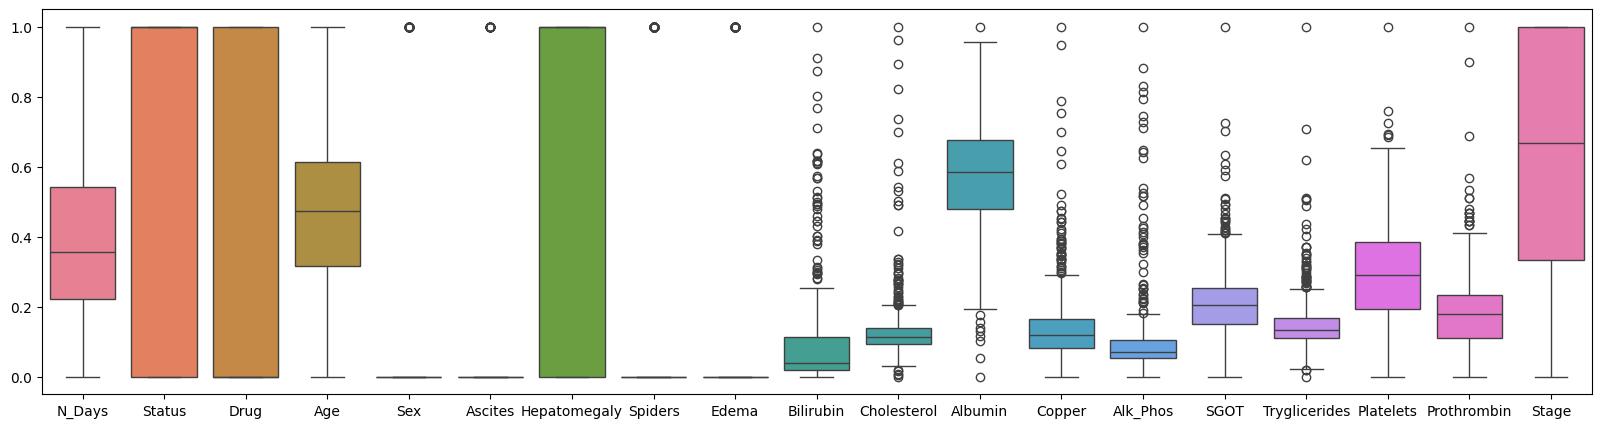

In [17]:
# Excluding 'ID' column from the data to be plotted
data = data.drop('ID', axis=1)

# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 5))
sns.boxplot(data=data)

In [18]:
# checking the correlation between all the features in the data
data.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,0.387981,0.054742,-0.125934,-0.007386,-0.247090,-0.287832,-0.180715,-0.271732,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.147495,-0.110685,-0.362013
Status,0.387981,1.000000,-0.006973,-0.241145,-0.112976,-0.290693,-0.220186,-0.207329,-0.277814,-0.416818,-0.141412,0.255241,-0.316915,-0.209875,-0.246648,-0.169090,0.114289,-0.354299,-0.298735
Drug,0.054742,-0.006973,1.000000,-0.158028,-0.019563,0.024685,-0.113408,0.142884,-0.007974,0.074236,0.076928,0.047487,0.063790,0.058669,0.068560,0.067222,0.063630,0.051674,0.058495
Age,-0.125934,-0.241145,-0.158028,1.000000,0.163341,0.183588,0.111522,-0.078040,0.199729,0.002362,-0.145054,-0.182350,0.034519,-0.060708,-0.139050,0.002323,-0.145948,0.113916,0.187852
Sex,-0.007386,-0.112976,-0.019563,0.163341,1.000000,0.015873,0.016205,-0.103809,0.027345,-0.027652,0.002405,0.030351,0.222314,0.038026,0.000706,0.056923,-0.089539,0.070666,0.017356
Ascites,-0.247090,-0.290693,0.024685,0.183588,0.015873,1.000000,0.079680,0.195960,0.409107,0.334283,-0.038174,-0.315648,0.235302,0.034538,0.101112,0.197834,-0.167735,0.268142,0.216645
Hepatomegaly,-0.287832,-0.220186,-0.113408,0.111522,0.016205,0.079680,1.000000,0.117692,0.128065,0.234372,0.064480,-0.269351,0.144227,0.023482,0.091103,0.083989,-0.181538,0.147127,0.356155
Spiders,-0.180715,-0.207329,0.142884,-0.078040,-0.103809,0.195960,0.117692,1.000000,0.213679,0.247932,0.093853,-0.162071,0.288117,0.086869,0.145465,0.122999,-0.103079,0.196611,0.245199
Edema,-0.271732,-0.277814,-0.007974,0.199729,0.027345,0.409107,0.128065,0.213679,1.000000,0.282617,-0.083280,-0.275728,0.187719,0.026758,0.099966,0.093510,-0.184942,0.289721,0.231441
Bilirubin,-0.403953,-0.416818,0.074236,0.002362,-0.027652,0.334283,0.234372,0.247932,0.282617,1.000000,0.336882,-0.314177,0.403761,0.104675,0.392112,0.370330,-0.013347,0.312007,0.200314


<Axes: >

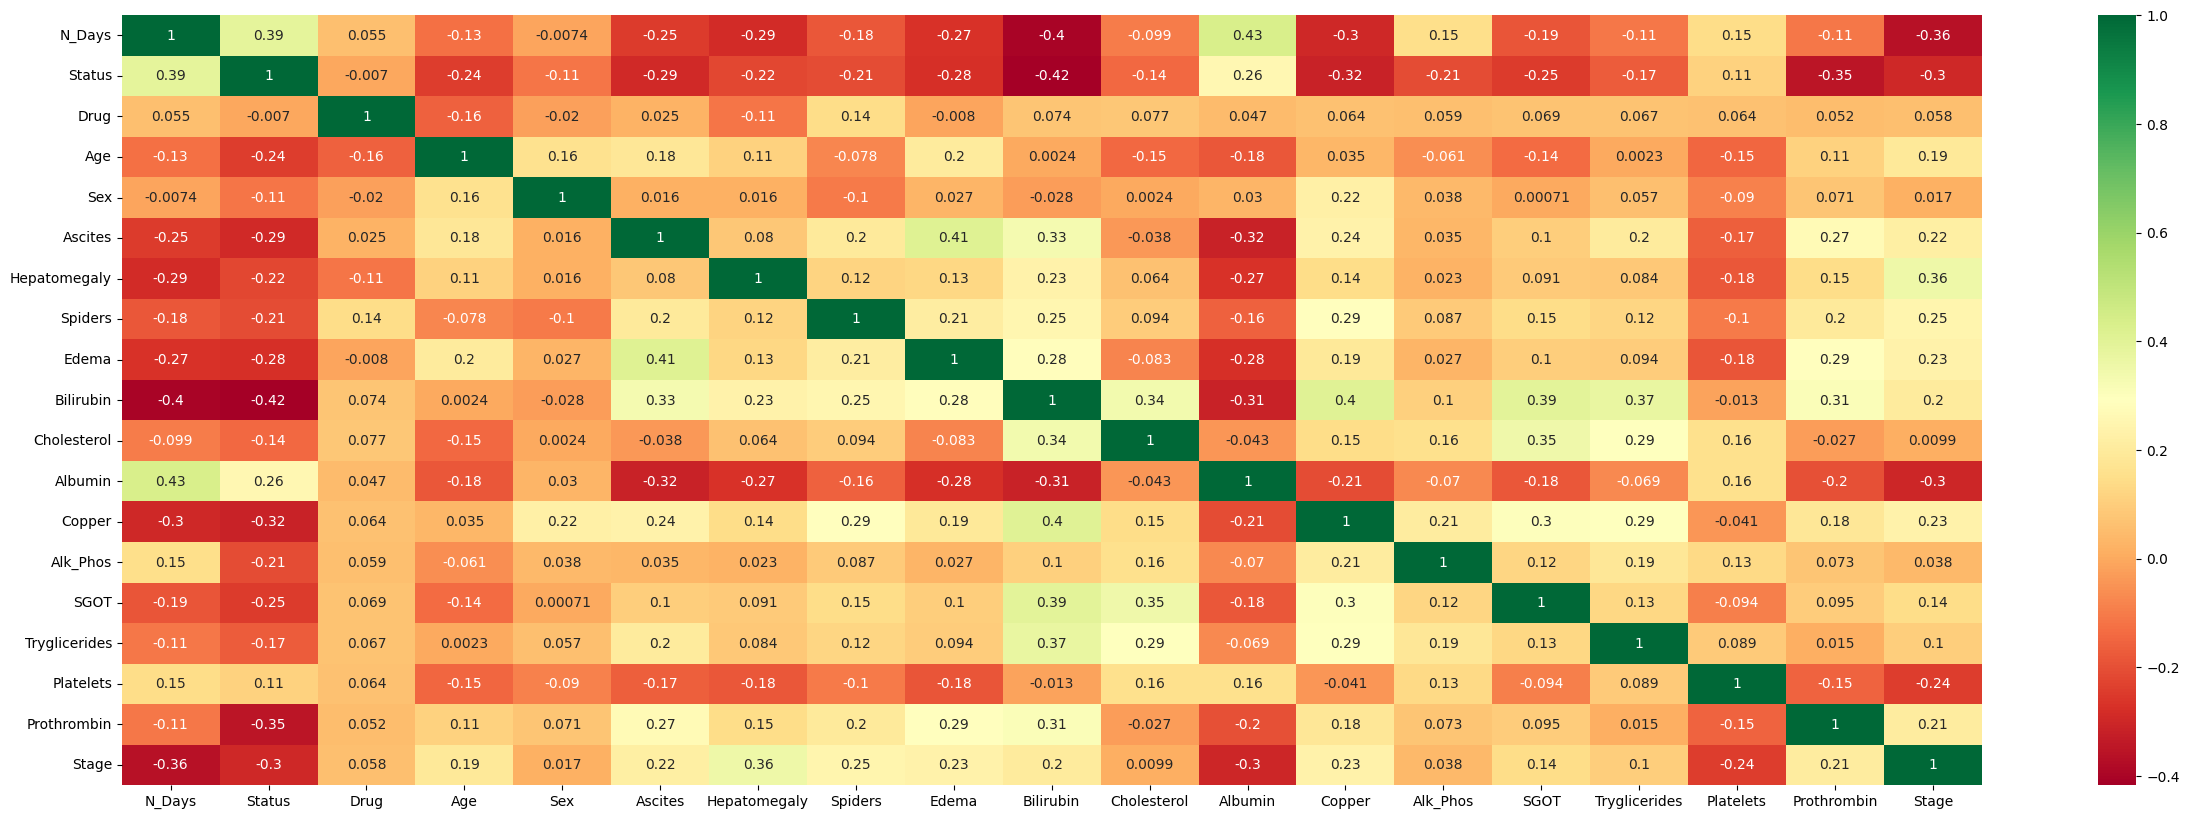

In [25]:
# the heat map of the correlation
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

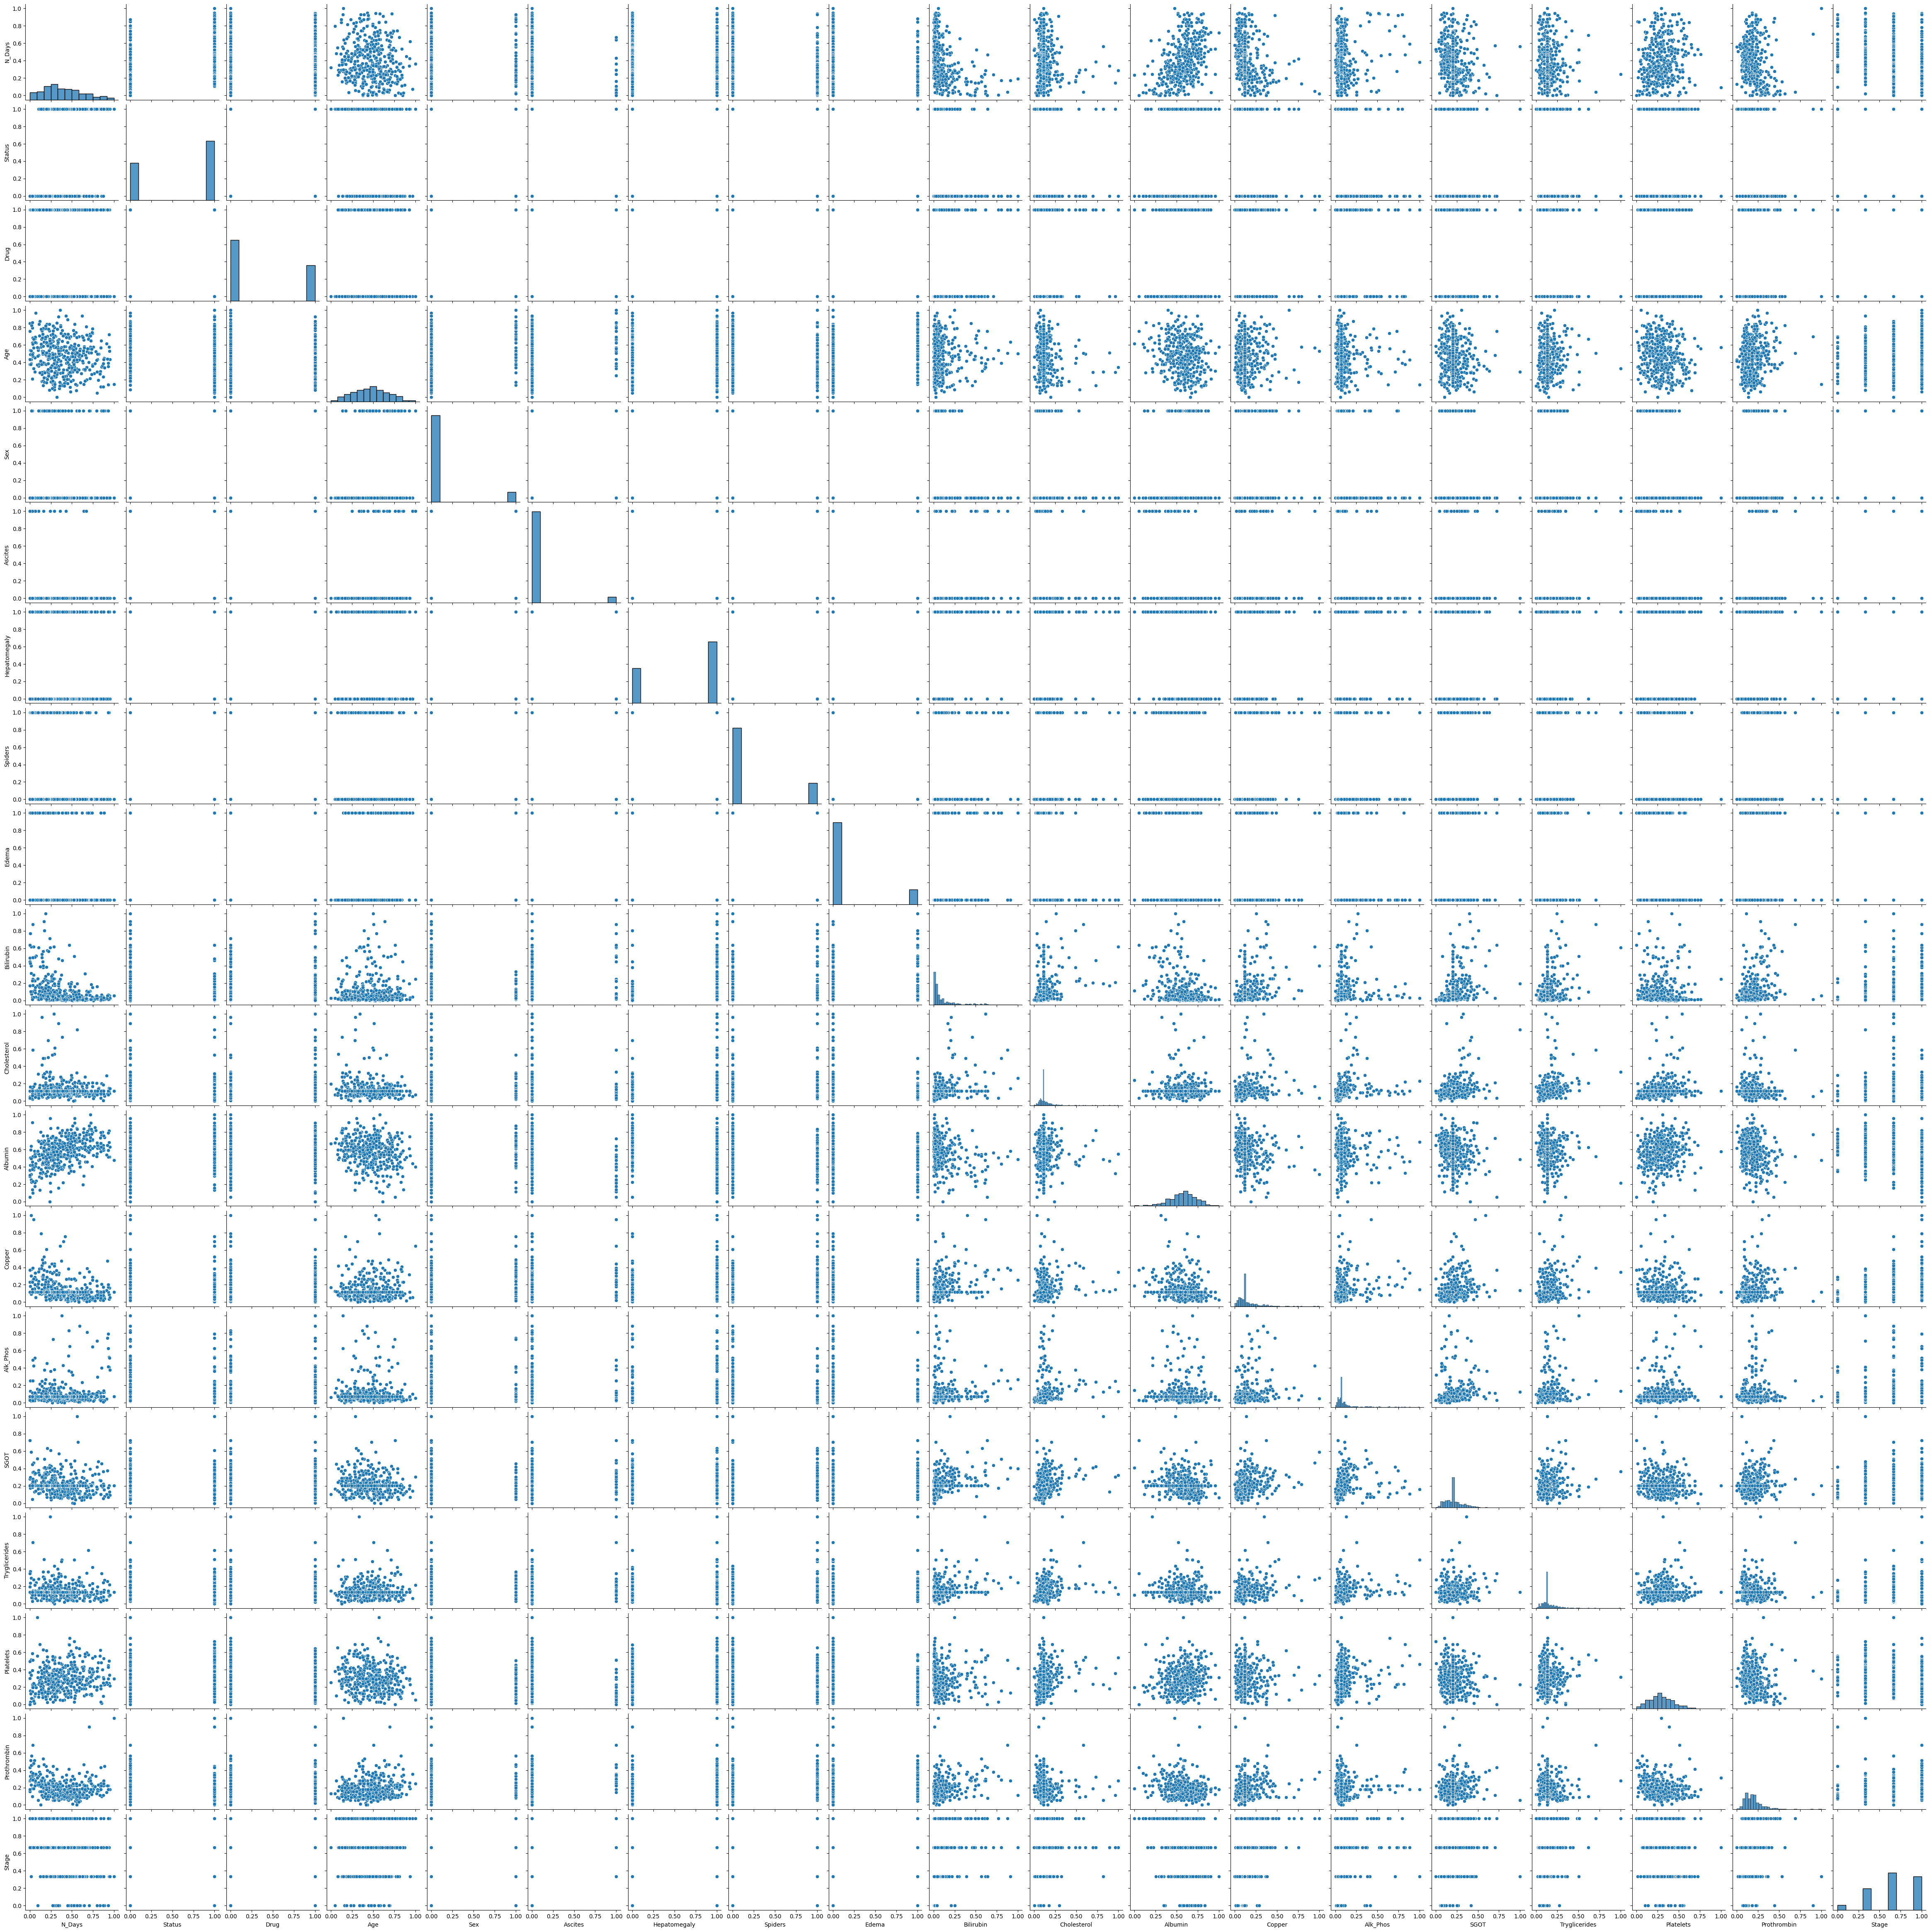

In [20]:
# pair plot to check the colinearity
sns.pairplot(data)

In [33]:
import statsmodels.api as sm

targets = ['Status']
features = [
    'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema'
]

for target in targets:
    model = sm.OLS(data[target], data[features]).fit()
    print(f"Model Summary for {target}:")
    print(model.summary())
    print("\n\n")


Model Summary for Status:
                                 OLS Regression Results                                
Dep. Variable:                 Status   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              65.14
Date:                Sun, 28 Jan 2024   Prob (F-statistic):                    2.98e-94
Time:                        17:42:19   Log-Likelihood:                         -244.66
No. Observations:                 418   AIC:                                      517.3
Df Residuals:                     404   BIC:                                      573.8
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
------------

In [34]:
from sklearn.model_selection import train_test_split

X = data[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

y = data["Status"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

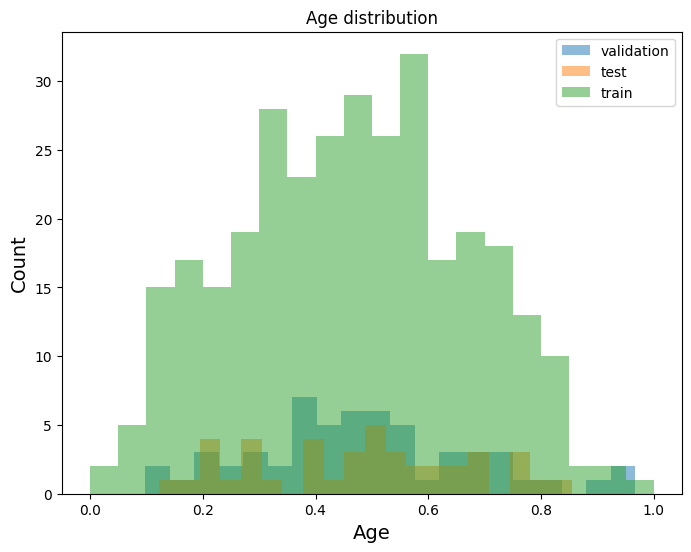

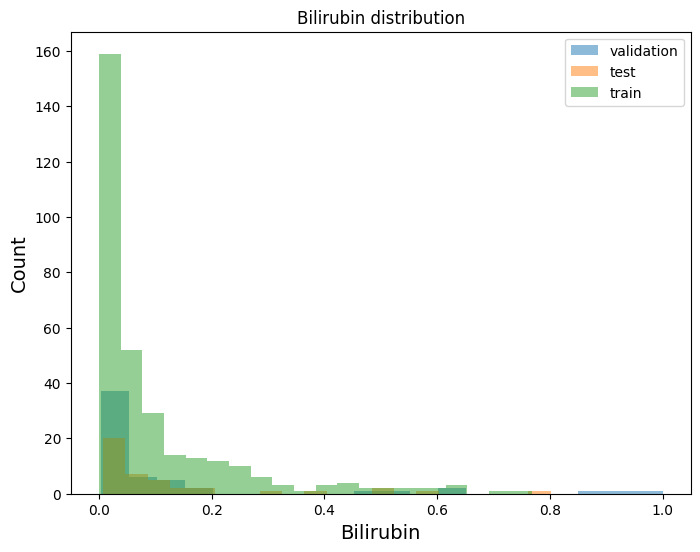

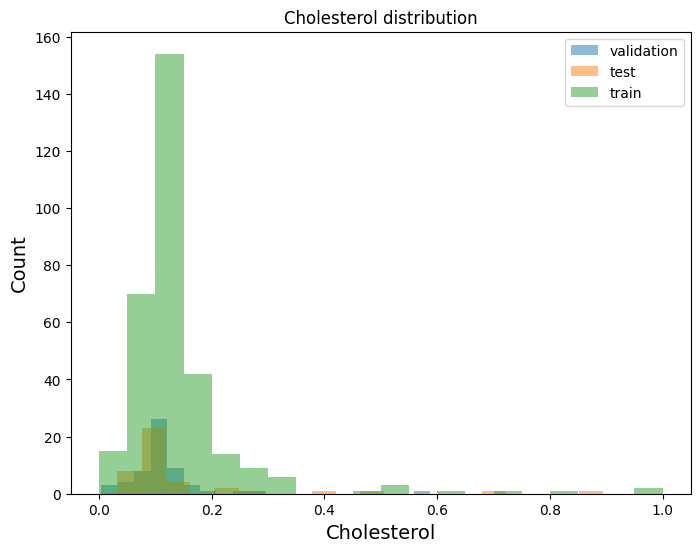

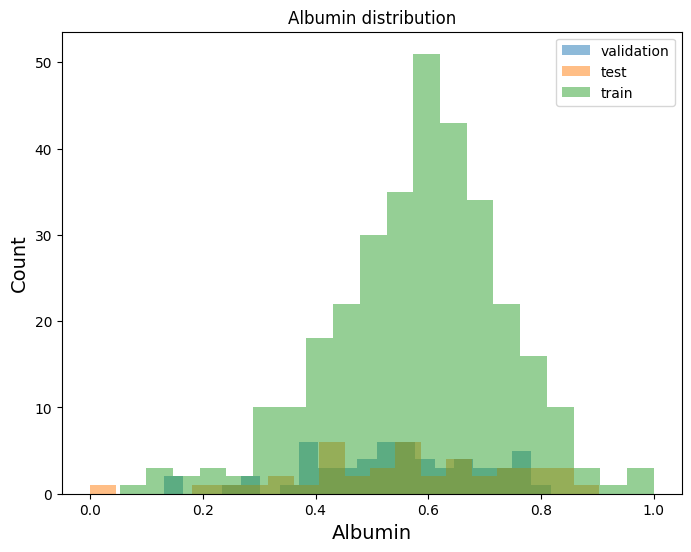

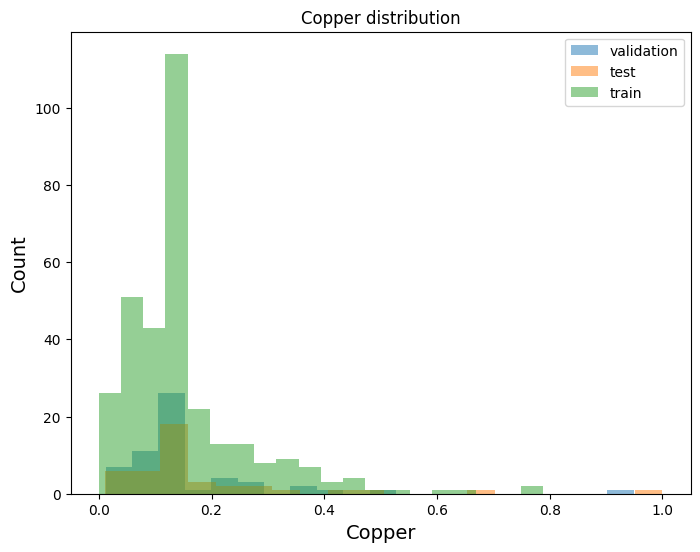

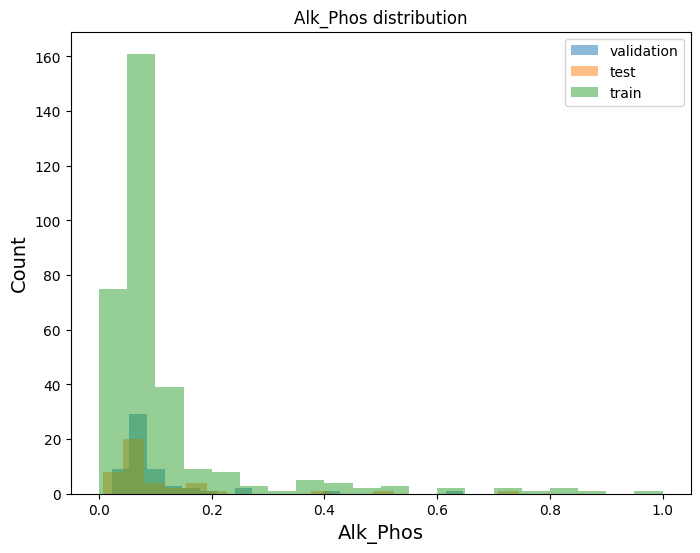

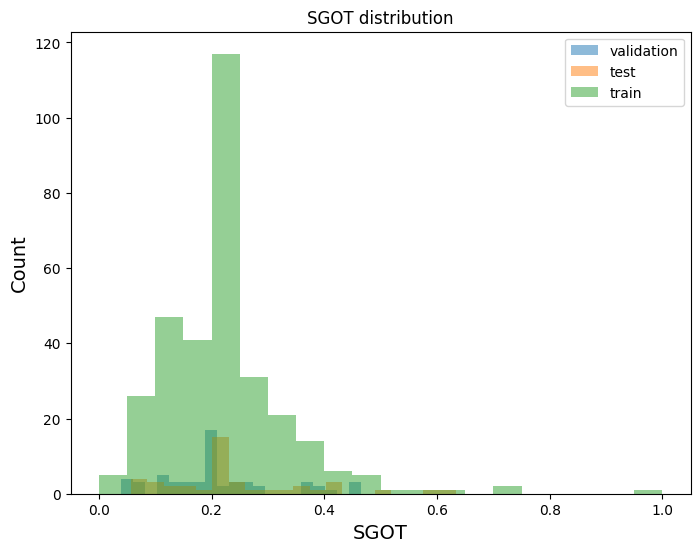

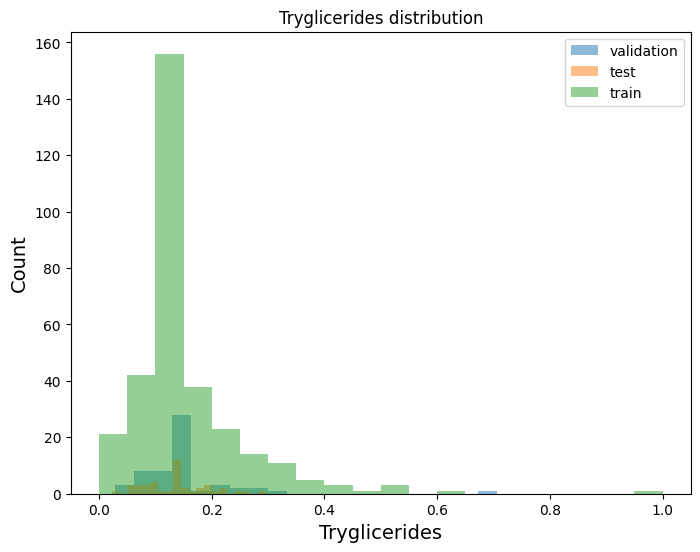

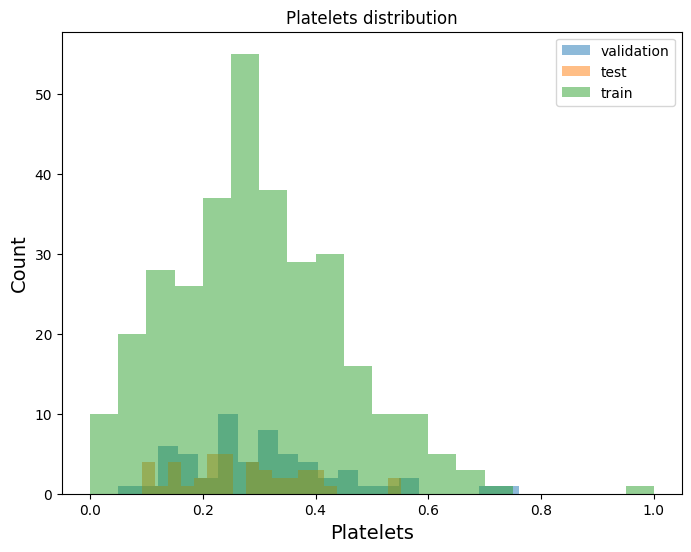

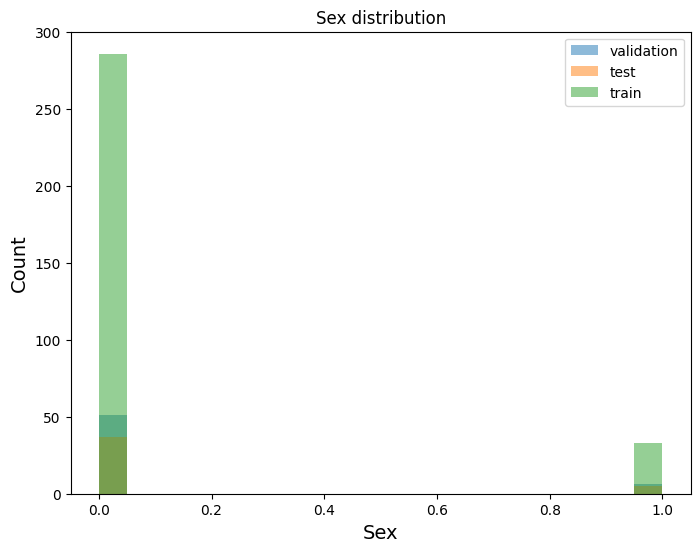

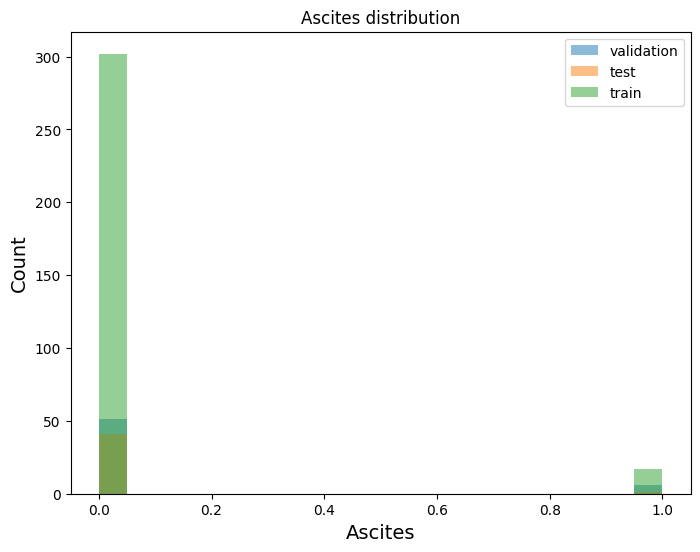

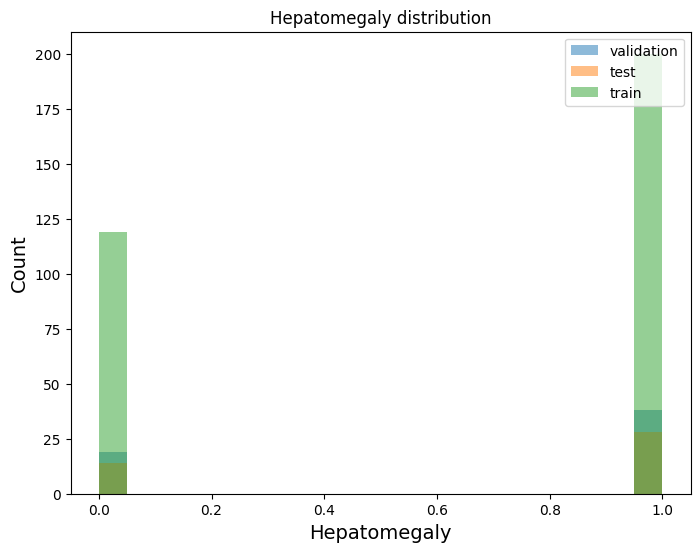

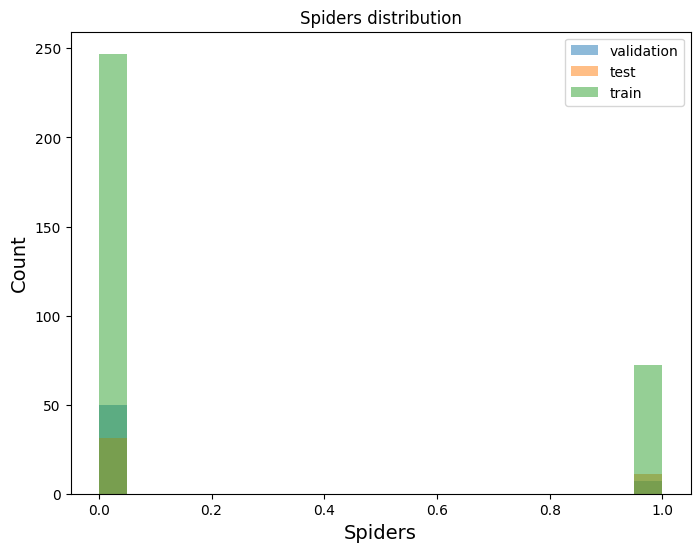

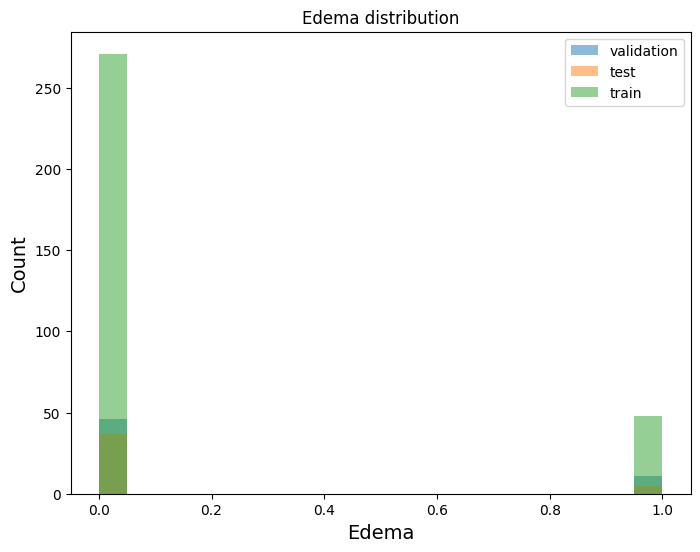

In [35]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

X_val_plot = X_val[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

X_train_plot = X_train[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()